<a href="https://colab.research.google.com/github/harshil-2507/Tokenizer/blob/main/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install datasets

In [9]:
from datasets import load_dataset
import re


In [10]:
# Load Gujarati split directly using streaming (guj_Gujr = Gujarati in Gujrati script)
indic_dataset = load_dataset("ai4bharat/IndicCorpV2", "indiccorp_v2", split="guj_Gujr", streaming=True)

In [12]:
def sentence_tokenize_regex(text):
    # Split on Gujarati or standard sentence-ending punctuation
    sentences = re.split(r'(?<=[।.!?])\s+', text.strip())
    return [s.strip() for s in sentences if s.strip()]

# print("All Tokenized Sentences:\n")
# for i, s in enumerate(sentences):
#     print(f"{i+1}: {s}")



In [13]:
def word_tokenize_regex(text):
    pattern = r'''(?x)
        (https?://[^\s]+)            # URLs
      | (\w+@\w+\.\w+)               # Emails
      | (\d{1,2}/\d{1,2}/\d{2,4})    # Dates
      | (\d+\.\d+|\d+)              # Numbers
      | ([\u0A80-\u0AFF]+)           # Gujarati Unicode letters
      | ([A-Za-z]+)                 # English words
      | ([^\w\s])                   # Punctuation
    '''
    matches = re.findall(pattern, text)
    tokens = [token for group in matches for token in group if token]
    return tokens



In [14]:
sentences = []
words = []
total_chars = 0

limit = 1000
count = 0

for sample in indic_dataset:
    text = sample['text']
    sents = sentence_tokenize_regex(text)
    sentences.extend(sents)

    for sent in sents:
        toks = word_tokenize_regex(sent)
        words.extend(toks)
        total_chars += sum(len(tok) for tok in toks)

    count += 1
    if count >= limit:
        break


In [15]:
with open("indic_gu_sentences.txt", "w", encoding="utf-8") as f:
    for s in sentences:
        f.write(s + "\n")

with open("indic_gu_words.txt", "w", encoding="utf-8") as f:
    for w in words:
        f.write(w + "\n")


In [16]:
num_sentences = len(sentences)
num_words = len(words)
avg_sent_len = num_words / num_sentences if num_sentences else 0
avg_word_len = total_chars / num_words if num_words else 0
ttr = len(set(words)) / num_words if num_words else 0

print("Total Sentences:", num_sentences)
print("Total Words:", num_words)
print("Total Characters:", total_chars)
print("Average Sentence Length (words):", avg_sent_len)
print("Average Word Length (chars):", avg_word_len)
print("Type/Token Ratio (TTR):", ttr)


Total Sentences: 1446
Total Words: 25111
Total Characters: 110600
Average Sentence Length (words): 17.365836791147995
Average Word Length (chars): 4.404444267452511
Type/Token Ratio (TTR): 0.3379793715901398


In [17]:
urls = []
emails = []
dates = []
numbers = []
gujarati_words = []
english_words = []
punctuation = []

for tok in words:
    if re.match(r'https?://[^\s]+', tok):
        urls.append(tok)
    elif re.match(r'\w+@\w+\.\w+', tok):
        emails.append(tok)
    elif re.match(r'\d{1,2}/\d{1,2}/\d{2,4}', tok):
        dates.append(tok)
    elif re.match(r'\d+\.\d+|\d+', tok):
        numbers.append(tok)
    elif re.match(r'^[\u0A80-\u0AFF]+$', tok):
        gujarati_words.append(tok)
    elif re.match(r'^[A-Za-z]+$', tok):
        english_words.append(tok)
    elif re.match(r'[^\w\s]', tok):
        punctuation.append(tok)


In [18]:
def print_category(title, token_list):
    print(f"\n🔹 {title} (first 100 tokens):\n")
    for tok in token_list[:100]:
        print(tok)

print_category("Gujarati Words", gujarati_words)
print_category("English Words", english_words)
print_category("Numbers", numbers)
print_category("Dates", dates)
print_category("Emails", emails)
print_category("URLs", urls)
print_category("Punctuation", punctuation)



🔹 Gujarati Words (first 100 tokens):

આ
વીડિયો
જુઓ
ઊંઝા
માર્કેટયાર્ડ
આજથી
જુલાઈ
સુધી
બંધ
મિથેનોલ
આવ્યો
ક્યાંથી
આખરે
ત્રણ
રાજ્યોમાં
મળેલ
હાર
પર
કોંગ્રેસ
અધ્યક્ષ
રાહુલ
ગાંધી
દ્વારા
પ્રથમ
પ્રતિક્રિયા
આપવામાં
આવી
છે
તેમણે
કહ્યું
કે
ત્રિપુરા
નાગાલેન્ડ
અને
મેઘાલયમાં
લોકોના
જનાદેશનો
સ્વાગત
કરીએ
છે
અને
આ
ક્ષેત્રના
લોકોનો
વિશ્વાસ
ફરીથી
જીતીવા
માટે
પ્રતિબદ્ધ
છીએ
આ
આંકડો
માટે
અને
વજન
ઘટાડવા
માટે
પ્રકાશનનો
દિવસ
વિતાવવો
ઉપયોગી
છે
ઉદાહરણ
તરીકે
અઠવાડિયામાં
એક
વખત
તમારા
માટે
એક
વિકલ્પ
પસંદ
કરો
જે
અગવડતાને
કારણે
નહીં
કરે
સૌથી
વધુ
લોકપ્રિય
કીફિર
પર
અનલોડ
છે
આ
ઠેકાઓ
પરથી
લીમડી
તેમજ
ઝાલોદના
બૂટલેગરો
વિદેશી
દારૃનો
મોટાપાયે
જથ્થો
ખરીદી
મહિસાગર
હાલોલ
ગોધરા

🔹 English Words (first 100 tokens):

Inn
Sidelets
truncheons
tablecloth
Sidelets
SBS
SBS
SBS
nebulizers
nebulizer
GST
GST
GST
skewer
skewers
LG
Virender
Sehwag
A
SHE
ASEAN
MLA
stirring
sifted
BPRD
access
time
pm
IST
IDP
RBI
sneakers
microcircuit
Sneakers
Prunes
ISIS
OTT
PM
x
bedsores
milder
Bhumi
Pednekar
freaks
charlatans
macroscopically
BCCI
W
Neeraj
A

In [19]:
!pip install matplotlib seaborn


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
sns.set(style="whitegrid")


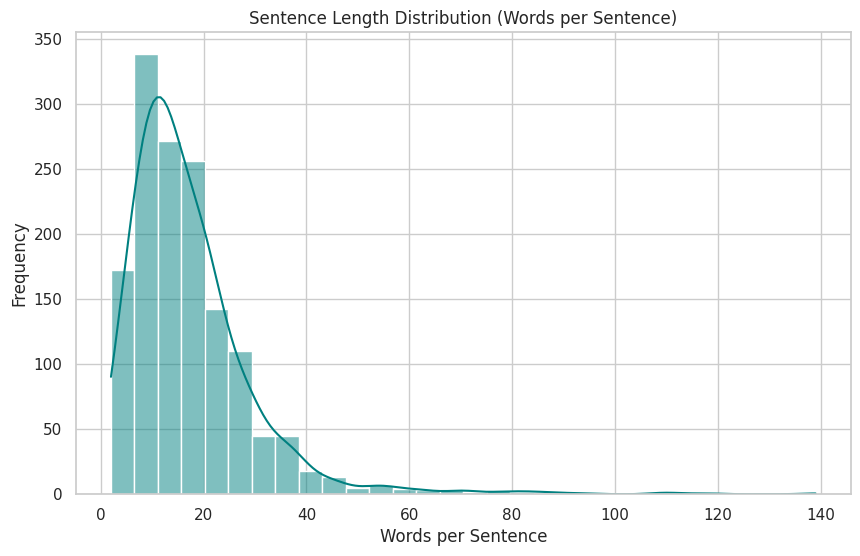

In [23]:
sentence_lengths = [len(word_tokenize_regex(sent)) for sent in sentences]

plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, bins=30, kde=True, color='teal')
plt.title('Sentence Length Distribution (Words per Sentence)')
plt.xlabel('Words per Sentence')
plt.ylabel('Frequency')
plt.show()


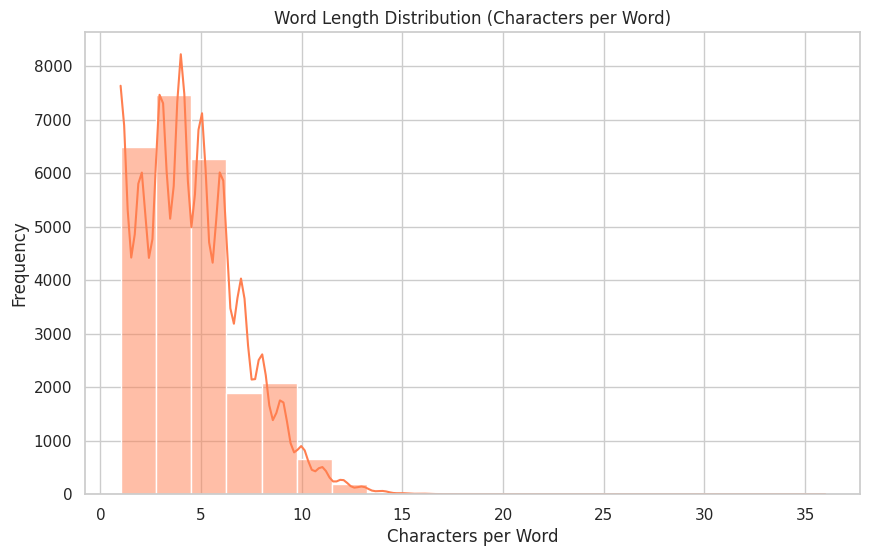

In [24]:
word_lengths = [len(w) for w in words]

plt.figure(figsize=(10, 6))
sns.histplot(word_lengths, bins=20, kde=True, color='coral')
plt.title('Word Length Distribution (Characters per Word)')
plt.xlabel('Characters per Word')
plt.ylabel('Frequency')
plt.show()


/tmp/ipython-input-25-3388417776.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(token_category_counts.keys()), y=list(token_category_counts.values()), palette="Set2")


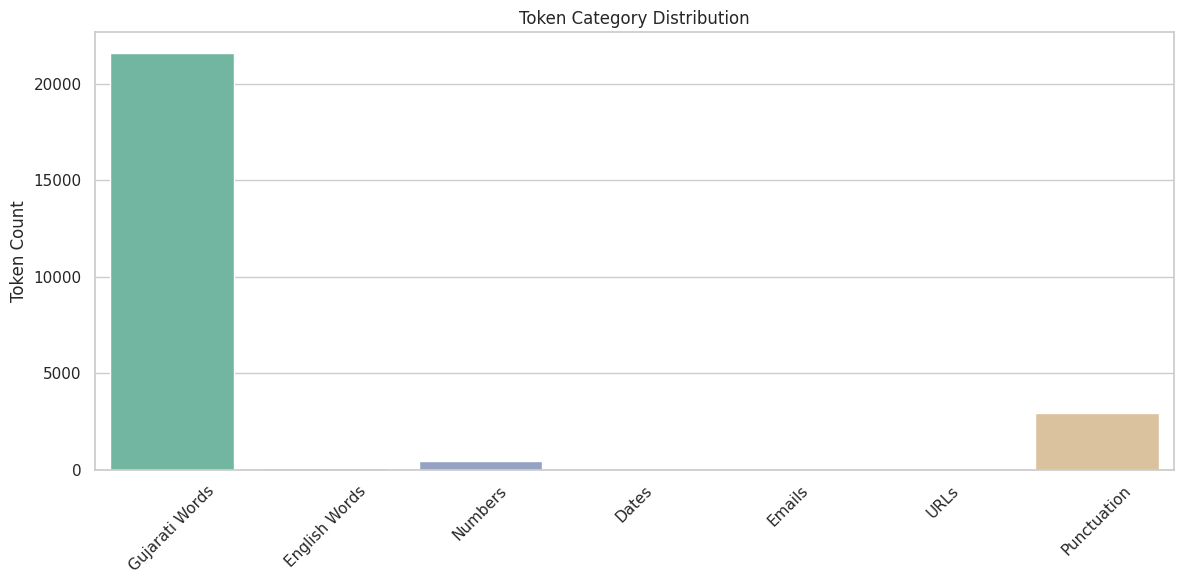

In [25]:
token_category_counts = {
    'Gujarati Words': len(gujarati_words),
    'English Words': len(english_words),
    'Numbers': len(numbers),
    'Dates': len(dates),
    'Emails': len(emails),
    'URLs': len(urls),
    'Punctuation': len(punctuation)
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(token_category_counts.keys()), y=list(token_category_counts.values()), palette="Set2")
plt.title('Token Category Distribution')
plt.xticks(rotation=45)
plt.ylabel('Token Count')
plt.tight_layout()
plt.show()


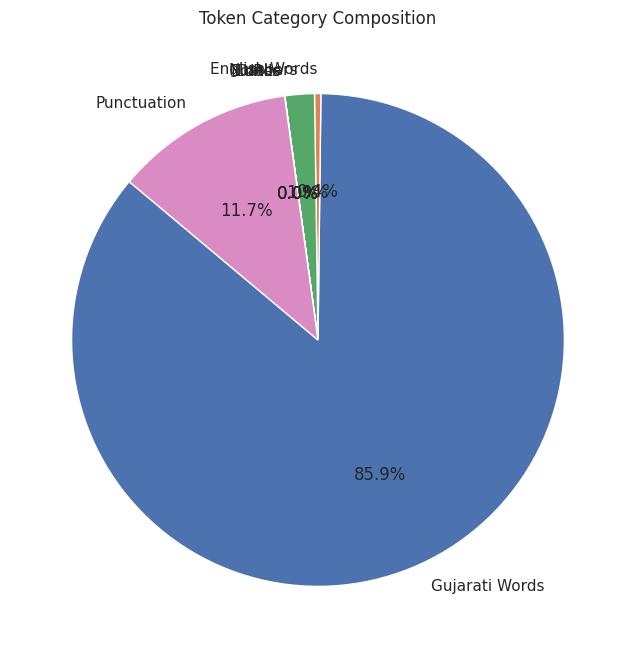

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(token_category_counts.values(), labels=token_category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Token Category Composition')
plt.show()


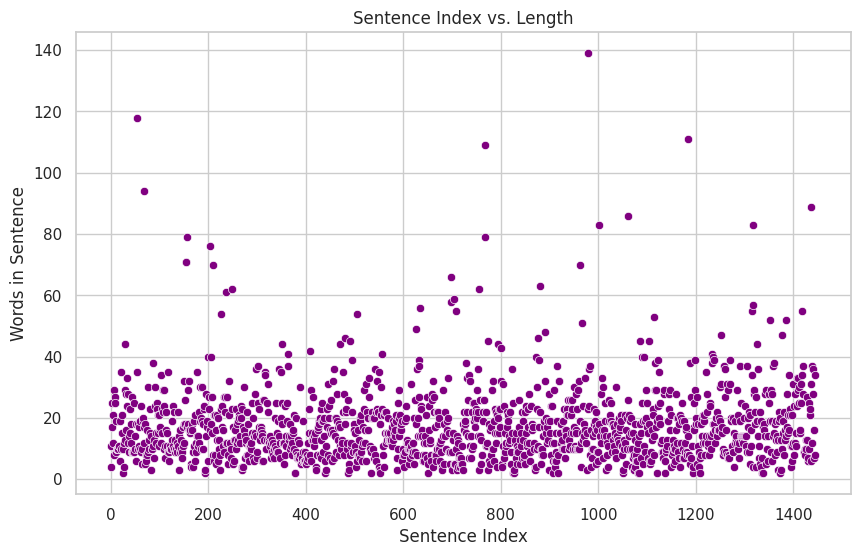

In [28]:
import pandas as pd

data = {
    "Sentence Index": list(range(len(sentences))),
    "Sentence Length": sentence_lengths
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Sentence Index", y="Sentence Length", color='purple')
plt.title("Sentence Index vs. Length")
plt.xlabel("Sentence Index")
plt.ylabel("Words in Sentence")
plt.show()
